In [180]:
import os
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.finance as finplt
import matplotlib.dates as pltdt
%matplotlib inline

In [181]:
os.getcwd()

'C:\\Apps\\Data\\Chipy'

In [182]:
#Start with a sample dataset - I'll change this to pull from github.
msft = pd.read_csv('msft_daily_price.csv',parse_dates = ['DATADATE'])
msft.columns = ['ticker','datadate','currency','adj_factor','prc_open','prc_close','prc_high','prc_low','shrs']

In [183]:
# Use df.head() to see the first 5 rows of the dataset
msft.head()

,ticker,datadate,currency,adj_factor,prc_open,prc_close,prc_high,prc_low,shrs
0,msft,1986-03-13,USD,288,NaN,28.00,29.25,25.5,3583000
1,msft,1986-03-14,USD,288,NaN,29.00,29.50,28.0,1070000
2,msft,1986-03-17,USD,288,NaN,29.50,29.75,29.0,462400
3,msft,1986-03-18,USD,288,NaN,28.75,29.75,28.5,230800
4,msft,1986-03-19,USD,288,NaN,28.25,29.00,28.0,166300


In [184]:
#Adjust the data for splits 
msft['open'] = msft['prc_open']/msft['adj_factor']
msft['close'] = msft['prc_close']/msft['adj_factor']
msft['high'] = msft['prc_high']/msft['adj_factor']
msft['low'] = msft['prc_low']/msft['adj_factor']

In [185]:
msft.dtypes


ticker                object
datadate      datetime64[ns]
currency              object
adj_factor             int64
prc_open             float64
prc_close            float64
prc_high             float64
prc_low              float64
shrs                   int64
open                 float64
close                float64
high                 float64
low                  float64
dtype: object

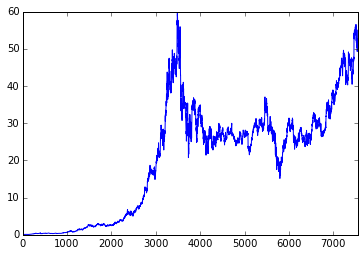

In [186]:
# Let's take a look at the data 
# This will plot out the Daily, split adjusted price, for MSFT.
msft['close'].plot();

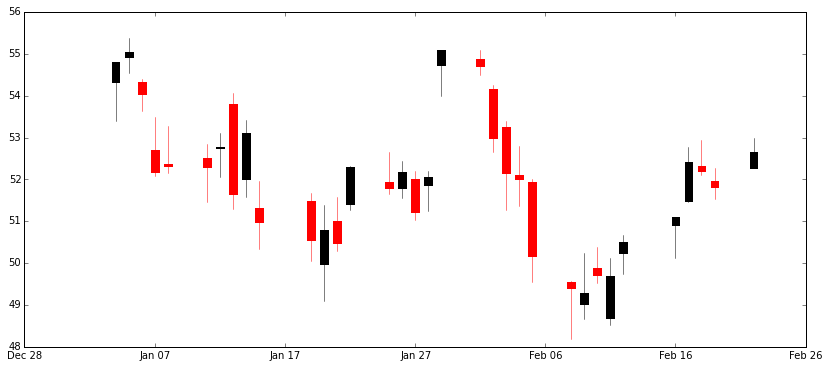

In [187]:
#That's cool, but can I have a more "finance-y" chart?

formatter = pltdt.DateFormatter('%b %d')

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(111)

ax.xaxis.set_major_formatter(formatter)

plotdata = msft[msft['datadate'] >= '2016-01-01'][['datadate', 'open', 'close', 'high', 'low']]
plotdata.datadate = pltdt.date2num(plotdata.datadate.dt.to_pydatetime())
plot_tuple = [tuple(x) for x in plotdata.to_records(index=False)]

finplt.candlestick_ochl(ax,plot_tuple,width=0.6);

#Moving Averages
Moving averages can be useful to find some of the points where the price has reversed direction indicating a buy or sell signal.

Start with a simple example.  Buy when the shorter window average moves above a longer window average. Sell (or close the trade) when it drops back below.

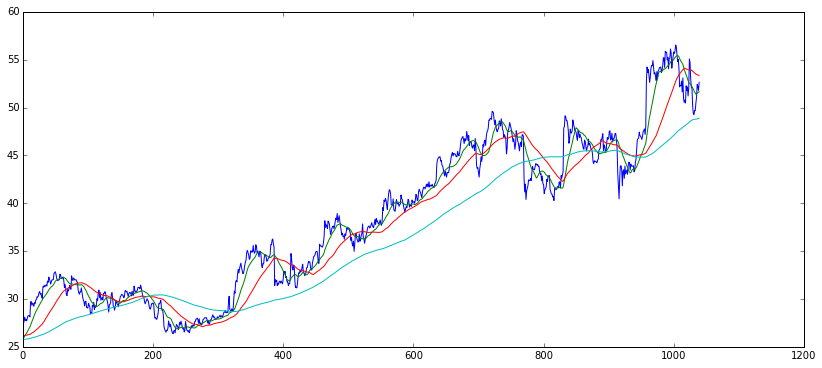

In [188]:
#Add the 20 day, 60 day and 200 day moving average.
msft['close_20d'] = pd.rolling_mean(msft['close'],20)
msft['close_60d'] = pd.rolling_mean(msft['close'],60)
msft['close_200d'] = pd.rolling_mean(msft['close'],200)

#Plot
avg_fig = plt.figure(figsize=(14,6))
msft[msft['datadate'] >= '2012-01-01'][['close','close_20d','close_60d','close_200d']].plot();

### Moving Average Strategies

Some of the opportunities here are fairly clear. There are some indications throughout the time series that suggest the near term price woas rising and indeed holding the stock while the shorter window average stayed higher would have resulted in a profitable trade.

Multiple bands can be included to add conviction to the buy/sell decision. (If three is good - why not 12?)

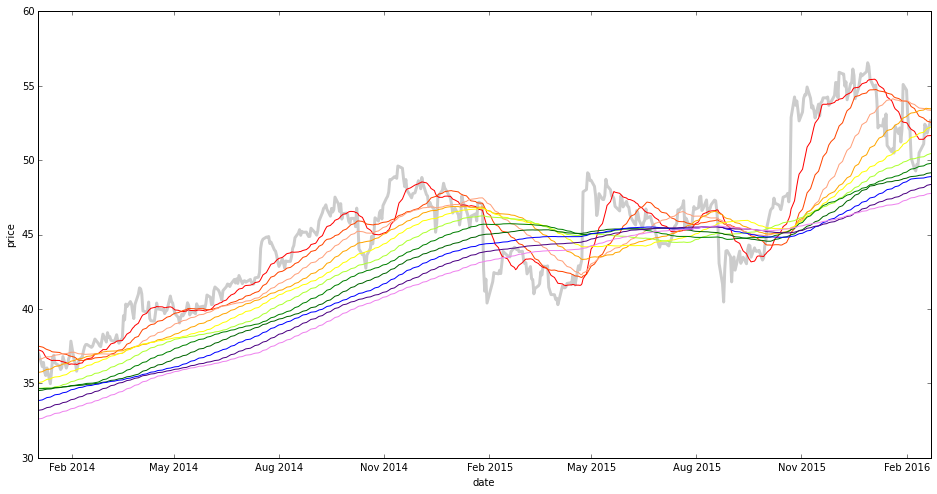

In [221]:
msft['close_5d'] = pd.rolling_mean(msft['close'],5)       #darkred
msft['close_20d'] = pd.rolling_mean(msft['close'],20)     #red
msft['close_40d'] = pd.rolling_mean(msft['close'],40)     #orangered
msft['close_60d'] = pd.rolling_mean(msft['close'],60)     #lightsalmon
msft['close_80d'] = pd.rolling_mean(msft['close'],80)     #orange
msft['close_100d'] = pd.rolling_mean(msft['close'],100)   #yellow
msft['close_125d'] = pd.rolling_mean(msft['close'],125)   #greenyellow
msft['close_150d'] = pd.rolling_mean(msft['close'],150)   #green
msft['close_175d'] = pd.rolling_mean(msft['close'],175)   #darkgreen
msft['close_200d'] = pd.rolling_mean(msft['close'],200)   #blue
msft['close_225d'] = pd.rolling_mean(msft['close'],225)   #indigo 
msft['close_250d'] = pd.rolling_mean(msft['close'],250)   #violet

plot_data = msft[msft['datadate'] >= '2014-01-01']

rainbow_fig, ax1 = plt.subplots(figsize=(16,8))
ax1.plot(plot_data['datadate'],plot_data['close'],'k-',lw=3,alpha=.2)
ax1.set_xlabel('date',color='k')
ax1.set_ylabel('price', color='k')

#ax1.plot(plot_data['datadate'],plot_data['close_5d'],'darkred')
ax1.plot(plot_data['datadate'],plot_data['close_20d'],'red')
ax1.plot(plot_data['datadate'],plot_data['close_40d'],'orangered')
ax1.plot(plot_data['datadate'],plot_data['close_60d'],'lightsalmon')
ax1.plot(plot_data['datadate'],plot_data['close_80d'],'orange')
ax1.plot(plot_data['datadate'],plot_data['close_100d'],'yellow')
ax1.plot(plot_data['datadate'],plot_data['close_125d'],'greenyellow')
ax1.plot(plot_data['datadate'],plot_data['close_150d'],'green')
ax1.plot(plot_data['datadate'],plot_data['close_175d'],'darkgreen')
ax1.plot(plot_data['datadate'],plot_data['close_200d'],'blue')
ax1.plot(plot_data['datadate'],plot_data['close_225d'],'indigo')
ax1.plot(plot_data['datadate'],plot_data['close_250d'],'violet')
plt.show()


##Deficiencies in moving average strategies - leading to the MACD

Can you make money trading moving averages - sure. Can you beat the market? It's tough.
1. Moving averages are inefficient, buying after the rally has started and selling after it has ended.
2. It's hard to scale because you might not be able to put it on for several days, not every stock is a good candidate for a moving average strategy.

The MACD (Moving Average Convergence/Divergence) seeks to improve the efficiency of a moving average strategy by timing the buy (sell) to the convergence (divergence) of the moving average streams instead of the explicit cross over.

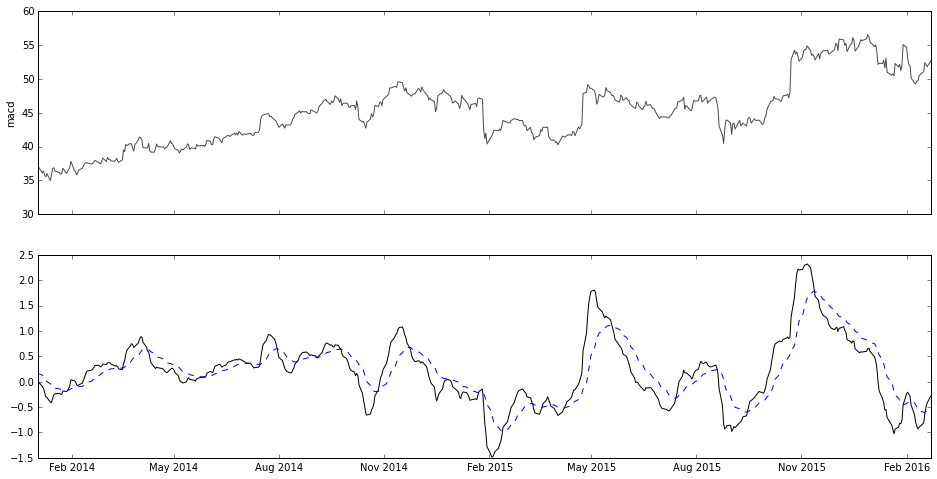

In [223]:
#Calculate as standard 9-12-26 MACD.
msft['close_12ema'] = pd.ewma(msft['close'],span=12) 
msft['close_26ema'] = pd.ewma(msft['close'],span=26) 
msft['close_macd'] = msft['close_12ema']-msft['close_26ema']
msft['macd_9ema'] = pd.ewma(msft['close_macd'],9)

plot_data = msft[msft['datadate'] >= '2014-01-01']

macd_fig, ax = plt.subplots(2, sharex=True,figsize=(16,8))
ax[0].plot(plot_data['datadate'],plot_data['close'],'k-',alpha=.7)
ax[0].set_ylabel('price', color='k')

ax[1].plot(plot_data['datadate'],plot_data['close_macd'],'k-')
ax[1].plot(plot_data['datadate'],plot_data['macd_9ema'],'b--')
ax[0].set_ylabel('macd', color='k')
plt.show()